# **Exploratory Data Analysis**

## Objectives

* The primary objective of this analysis is to explore and visualise air pollution trends across regions and cities in the United States from 2000–2016. The cleaned dataset (analysis.csv) provides an opportunity to uncover insights that are both descriptive and diagnostic.

## Inputs

* Cleaned data - analysis.csv

## Outputs

- 1. Top 10 Most Polluted Cities
- 2. Top 10 Cleanest Cities
- 3. Top regions Treemap
- 4. Number of Measurements per State (Top 10)
- 5. Average NO2 AQI by State (Top 5)
- 6. Highest Recorded O3 AQI
- 7. Correlation Between Pollutant Means
- 8. Average AQI by year for NO2, 03, SO2, CO
- 9. NO2 AQI vs CO AQI for Top 5 States
- 10. Median AQI for NO2, O3, SO2, and CO in Top 5 States
- 11. City Distribution with Region Filter
- 12. Minimum and Maximun Pollution by Region

## Scope

- This analysis focuses on comparisons between regions and cities rather than individual-level records.

- Uses simple descriptive methods (averages, counts, ranges) supported by bar charts, boxplots, and heatmaps.

- Where categories are too many to view clearly, filtering or grouping has been applied to make the results easier to interpret.

- The analysis is exploratory in nature, providing direction for future work rather than final conclusions.. 



In [3]:
# Change working directory current folder to parent folder

import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\slych\\air-quality-dashboard\\jupyter_notebooks'

In [4]:
#Make parent of current directory the new current directory

os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\slych\\air-quality-dashboard'

## Section 1: Setup & Data Loading

In [ ]:
%pip install matplotlib seaborn plotly
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

---

In [7]:
# load clean dataset for analysis

csv_path = "data/analysis.csv"
df = pd.read_csv(csv_path)


In [8]:
# Standardize column names

df.columns = df.columns.str.lower().str.strip()

In [9]:
# Extract year & month from date column (if exists)

if 'date_local' in df.columns:
    df['date_local'] = pd.to_datetime(df['date_local'], errors='coerce')
    df['year'] = df['date_local'].dt.year
    df['month'] = df['date_local'].dt.month

In [10]:
# Create region & city columns if missing

if 'state' in df.columns and 'county' in df.columns:
    df['region'] = df['state']
if 'city' not in df.columns and 'county' in df.columns:
    df['city'] = df['county']

In [11]:
# Identify numeric pollution columns

pollutants = [col for col in df.columns if any(x in col for x in ['pm', 'o3', 'no2', 'so2', 'co']) and df[col].dtype in ['float64', 'int64']]
print("Pollutants detected:", pollutants)

Pollutants detected: ['state code', 'county code', 'no2 mean', 'no2 1st max value', 'no2 1st max hour', 'no2 aqi', 'o3 mean', 'o3 1st max value', 'o3 1st max hour', 'o3 aqi', 'so2 mean', 'so2 1st max value', 'so2 1st max hour', 'so2 aqi', 'co mean', 'co 1st max value', 'co 1st max hour', 'co aqi']


## Section 2: Graphical Insights

#### 1. Top 10 Most Polluted Cities
- A horizontal bar chart shows the top 10 cities with the highest recorded maximum pollutant values.

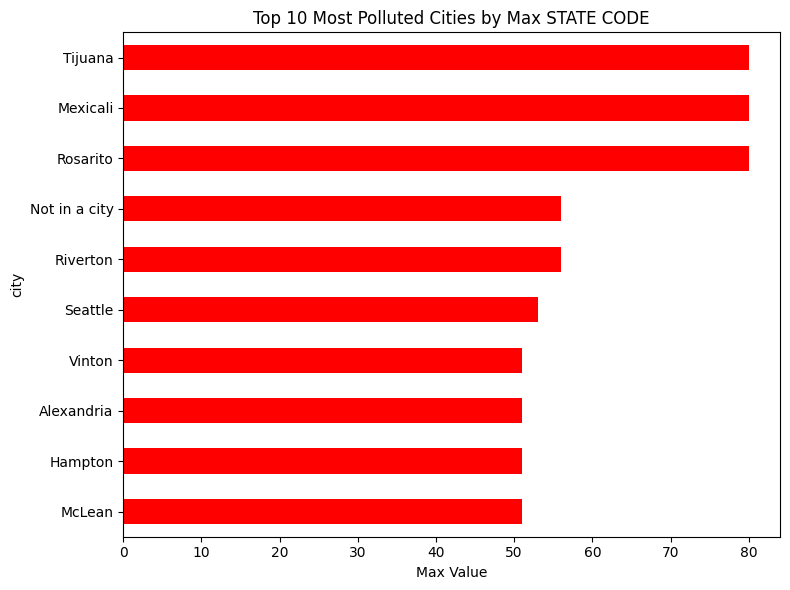

In [14]:
top10_max = df.groupby('city')[pollutants[0]].max().sort_values(ascending=False).head(10)
top10_max.plot(kind='barh', color='red', figsize=(8,6))
plt.title(f"Top 10 Most Polluted Cities by Max {pollutants[0].upper()}")
plt.xlabel("Max Value")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The horizontal bar chart above highlights the 10 cities with the highest recorded pollution levels, pointing to urban pollution hotspots.

#### 2. Top 10 Cleanest Cities
- A horizontal bar chart of the top 10 cities with the lowest minimum pollutant levels.

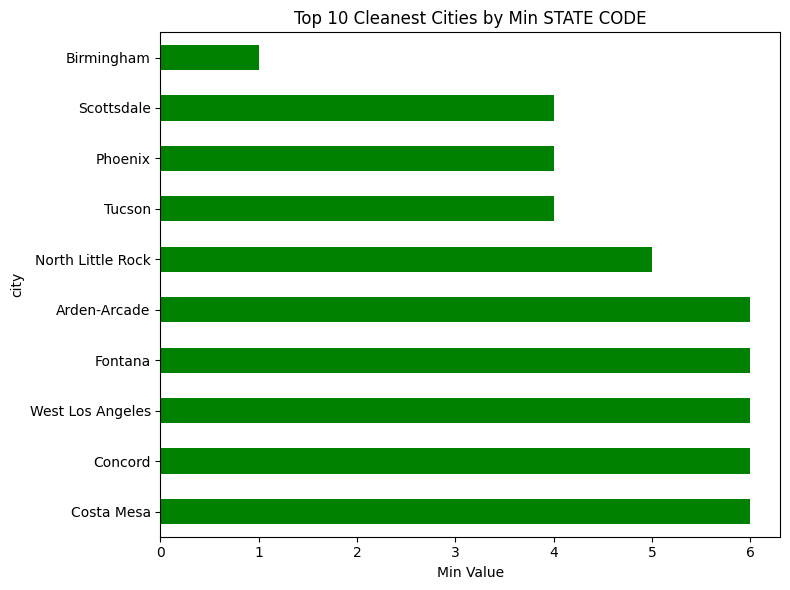

In [15]:
top10_min = df.groupby('city')[pollutants[0]].min().sort_values(ascending=True).head(10)
top10_min.plot(kind='barh', color='green', figsize=(8,6))
plt.title(f"Top 10 Cleanest Cities by Min {pollutants[0].upper()}")
plt.xlabel("Min Value")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The horizontal bar chart above displays the 10 cleanest cities, providing contrast to highly polluted locations.

#### 3. Top regions Treemap
- A treemap visualization of the top 15 regions based on the number of measurements.

In [18]:
%pip install squarify
import squarify

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


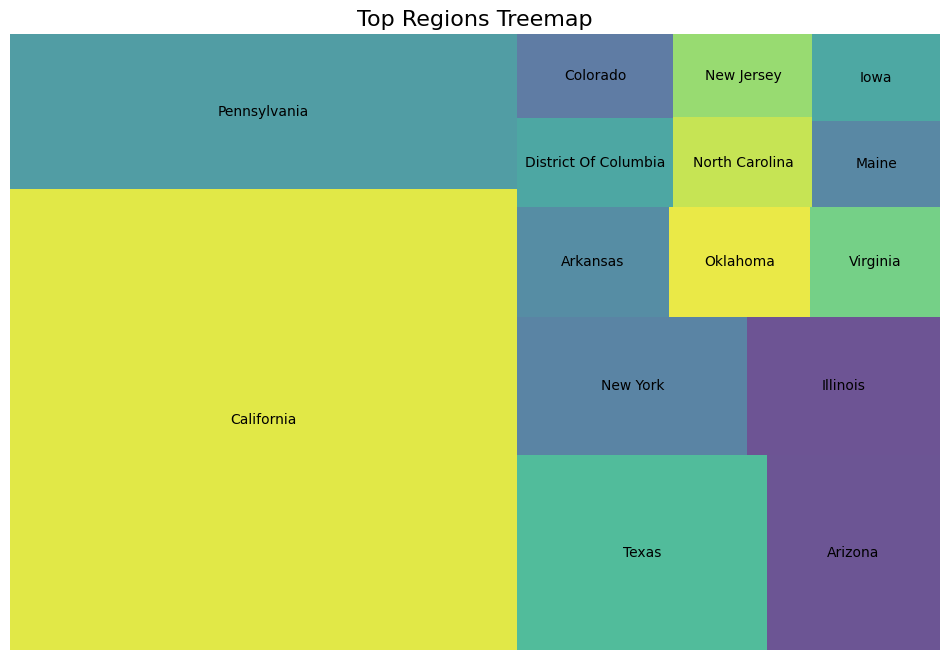

In [19]:
region_counts = df['region'].value_counts().head(15)

plt.figure(figsize=(12, 8)) 
squarify.plot(
    sizes=region_counts.values,
    label=region_counts.index,
    alpha=.8
)
plt.axis('off')
plt.title("Top Regions Treemap", fontsize=16)  
plt.show()

The treemap visualizes where measurements are most concentrated, showing monitoring intensity across regions

#### 4. Number of Measurements per State (Top 10)
- A bar chart of the top 10 states by total measurement counts.

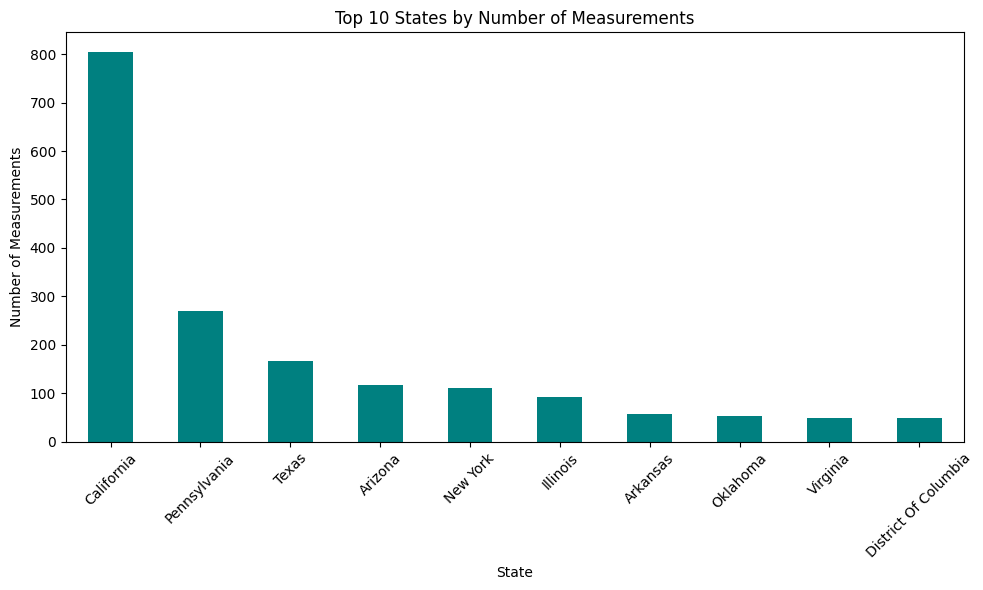

In [20]:
# Count measurements by state
count_state = df['state'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
count_state.plot(kind='bar', color='teal')
plt.title('Top 10 States by Number of Measurements')
plt.xlabel('State')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart above shows the top 10 states by the number of air quality measurements, indicating where data collection efforts have been most concentrated.

#### 5. Average NO2 AQI by State (Top 5)
- A bar chart showing the top 5 states with the highest average NO2 AQI values.

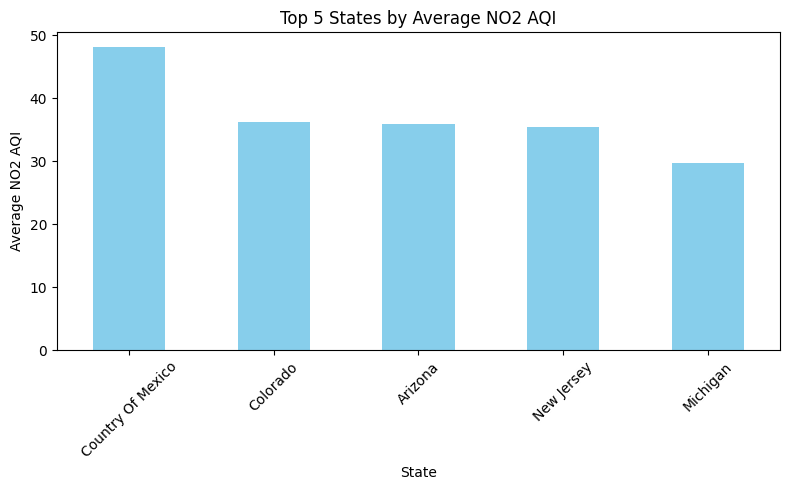

In [21]:
# Compute average NO2 AQI by state
avg_no2 = df.groupby('state')['no2 aqi'].mean().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(8, 5))
avg_no2.plot(kind='bar', color='skyblue')
plt.title('Top 5 States by Average NO2 AQI')
plt.xlabel('State')
plt.ylabel('Average NO2 AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart above displays the top 5 states with the highest average NO2 AQI levels, providing a clear visual comparison to identify regions with elevated nitrogen dioxide pollution

#### 6. Highest Recorded O3 AQI
- A single-bar chart highlighting the maximum O3 AQI recorded, along with the location and date

In [22]:
# Find the highest O3 AQI
max_o3 = df['o3 aqi'].max()
max_o3_row = df[df['o3 aqi'] == max_o3].iloc[0]
label = f"{max_o3_row['city']}, {max_o3_row['state']} on {max_o3_row['date local']}"

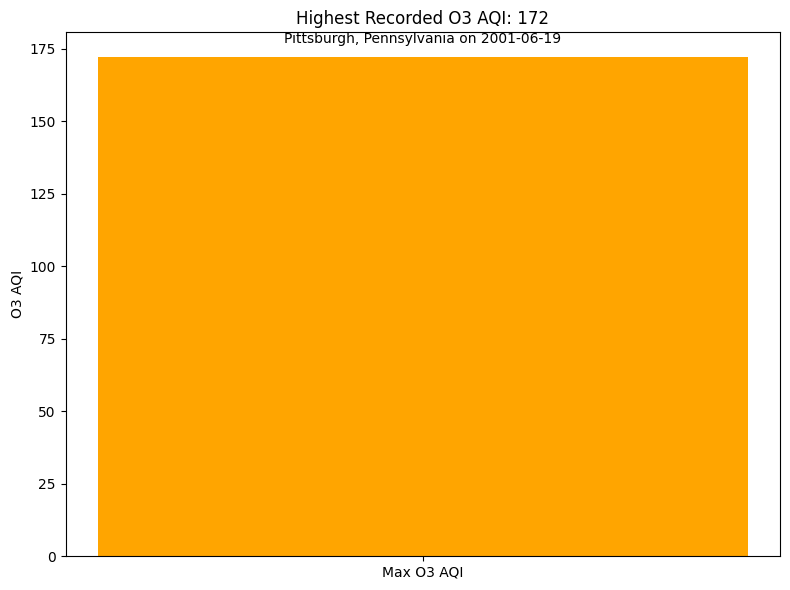

In [23]:
# Plot
plt.figure(figsize=(8, 6))
plt.bar('Max O3 AQI', max_o3, color='orange')
plt.title(f'Highest Recorded O3 AQI: {max_o3}')
plt.ylabel('O3 AQI')
plt.text(0, max_o3 + 5, label, ha='center')
plt.tight_layout()
plt.show()

This single-bar chart above emphasises the maximum O3 AQI value recorded, serving as a visual marker for the peak ozone pollution event in the dataset.

#### 7. Correlation Between Pollutant Means
- A heatmap displaying correlations between average pollutant values (NO2, O3, SO2, CO)

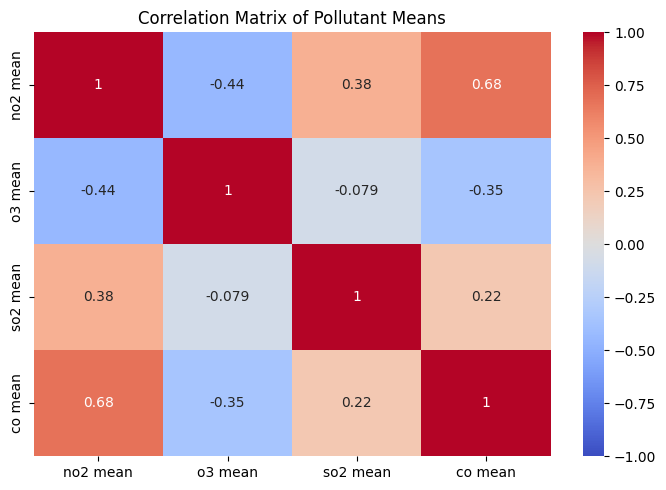

In [24]:
# Select relevant columns (use lowercase column names)
pollutant_means = df[['no2 mean', 'o3 mean', 'so2 mean', 'co mean']]

# Compute correlation matrix
corr_matrix = pollutant_means.corr()

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Pollutant Means')
plt.tight_layout()
plt.show()

The heatmap above visualizes the correlations between average levels of NO2, O3, SO2, and CO, using color gradients to reveal positive and negative relationships among pollutants. Strong correlations (e.g., NO2 ↔ CO). Weaker correlations highlight pollutants with independent patterns.

#### 8. Average AQI by year for NO2, 03, SO2, CO
- A multi-line chart tracking yearly average AQI levels for the four pollutants.

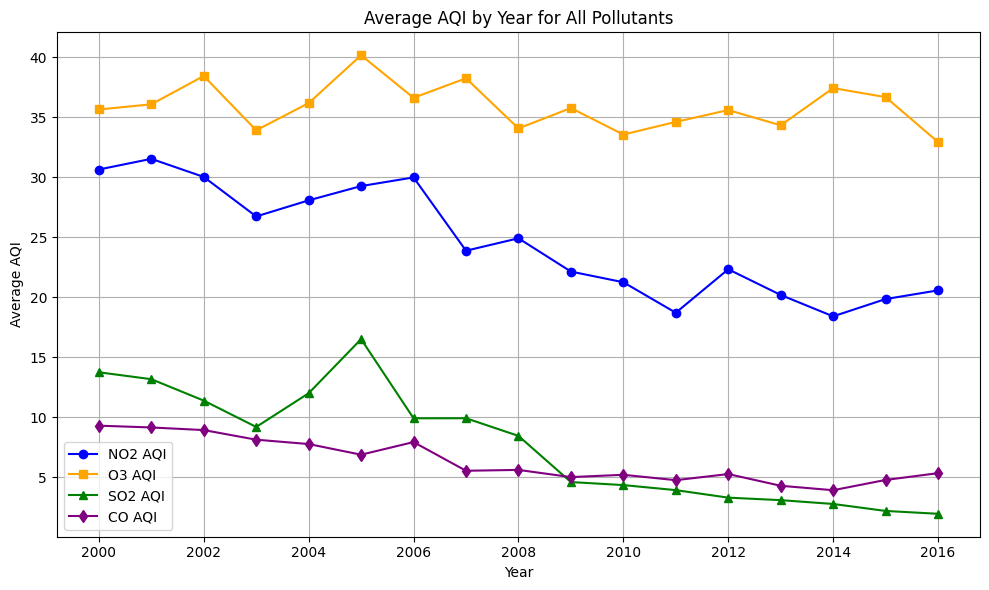

In [27]:
# Compute average AQI for each pollutant by year

avg_no2 = df.groupby('year')['no2 aqi'].mean().sort_index()
avg_o3 = df.groupby('year')['o3 aqi'].mean().sort_index()
avg_so2 = df.groupby('year')['so2 aqi'].mean().sort_index()
avg_co = df.groupby('year')['co aqi'].mean().sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_no2.index, avg_no2, marker='o', color='blue', label='NO2 AQI')
plt.plot(avg_o3.index, avg_o3, marker='s', color='orange', label='O3 AQI')
plt.plot(avg_so2.index, avg_so2, marker='^', color='green', label='SO2 AQI')
plt.plot(avg_co.index, avg_co, marker='d', color='purple', label='CO AQI')
plt.title('Average AQI by Year for All Pollutants')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart above illustrates the annual trends in average AQI levels for NO2, O3, SO2, and CO from 2000 to 2016, using distinct colors and markers for each pollutant to ensure clarity. It highlights temporal patterns, such as declines in SO2 and CO AQI, while NO2 and O3 show more variability, aiding in understanding air quality changes over time. SO2 and CO show steady declines, reflecting regulation success. NO2 and O3 fluctuate more, tied to urban and atmospheric processes.

#### 9. NO2 AQI vs CO AQI for Top 5 States
- A scatter plot with trendlines comparing NO2 AQI and CO AQI for the top 5 states by measurement count.

In [28]:

# Get top 5 states by measurement count
top_states = df['state'].value_counts().head(5).index

# Filter data for top 5 states
filtered_df = df[df['state'].isin(top_states)]

# Create scatter plot
fig = px.scatter(
    filtered_df,
    x='no2 aqi',
    y='co aqi',
    color='state',
    title='NO2 AQI vs CO AQI for Top 5 States',
    color_discrete_sequence=px.colors.qualitative.Set2,
    trendline='ols',  # Add ordinary least squares trend line
    hover_data=['city', 'date local']
)

# Update layout for clarity
fig.update_layout(
    xaxis_title='NO2 AQI',
    yaxis_title='CO AQI',
    width=900,
    height=600,
    legend_title='State'
)

# Show plot
fig.show()

c:\Users\slych\air-quality-dashboard\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


The scatter plot above shows the relationship between NO2 AQI and CO AQI, which have a strong positive correlation (0.75 from the earlier correlation matrix).

#### 10. Median AQI for NO2, O3, SO2, and CO in Top 5 States
- A grouped bar chart comparing median AQI values across pollutants for the top 5 states.

In [29]:
# Get top 5 states by measurement count
top_states = df['state'].value_counts().head(5).index

# Filter data for top 5 states
filtered_df = df[df['state'].isin(top_states)]

# Compute median AQI for each pollutant by state
median_aqi = filtered_df.groupby('state')[['no2 aqi', 'o3 aqi', 'so2 aqi', 'co aqi']].median().reset_index()

# Melt the dataframe for plotting
melted_df = median_aqi.melt(
    id_vars='state',
    value_vars=['no2 aqi', 'o3 aqi', 'so2 aqi', 'co aqi'],
    var_name='Pollutant',
    value_name='Median AQI'
)

# Create grouped bar plot
fig = px.bar(
    melted_df,
    x='state',
    y='Median AQI',
    color='Pollutant',
    barmode='group',
    title='Median AQI for NO2, O3, SO2, and CO in Top 5 States',
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Update layout for clarity
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Median AQI',
    legend_title='Pollutant',
    width=900,
    height=600
)

# Show plot
fig.show()

c:\Users\slych\air-quality-dashboard\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



The Bar plot above shows median AQI values for NO2, O3, SO2, and CO across the top 5 states with the most measurements, showing which pollutants dominate in each region. The grouped bar layout ensures clarity by separating pollutants within each state. The interactive nature allows users to hover for precise values, providing a straightforward yet relevant comparison of air quality without overwhelming detail. 

#### 11. City Distribution with Region Filter
- An interactive bar chart showing city-level measurement counts, with a dropdown filter to view by region.

In [34]:
fig = px.bar(
    df['city'].value_counts().reset_index(name='count'),
    x='city',
    y='count',
    title="City Distribution with Region Filter",
    labels={'city': 'City', 'count': 'Count'}
)

# Add dropdown filter by Region
regions = df["region"].unique()
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "label": region,
                    "method": "update",
                    "args": [
                        {
                            "x": [df[df["region"] == region]["city"].value_counts().index],
                            "y": [df[df["region"] == region]["city"].value_counts().values]
                        },
                        {"title": f"City Distribution for {region}"}
                    ],
                }
                for region in regions
            ] + [
                {
                    "label": "All",
                    "method": "update",
                    "args": [
                        {
                            "x": [df['city'].value_counts().index],
                            "y": [df['city'].value_counts().values]
                        },
                        {"title": "City Distribution for All Regions"}
                    ],
                }
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)

fig.show()

The chart above displays the number of records associated with each city, grouped by region. The dropdown filter allows exploration of specific regions, making it easier to compare cities without overcrowding the visual. Taller bars indicate cities with higher counts, highlighting where activity is most concentrated within the dataset.

#### 12. Minimum and Maximun Pollution by Region
- An interactive bar chart showing minimum and maximum NO2 AQI per region, with a dropdown toggle.

In [38]:
# Use the correct column names: 'region' and a valid pollutant column, e.g., 'no2 aqi'
pollution_stats = df.groupby("region")["no2 aqi"].agg(["min", "max"]).reset_index()

# Create initial figure with "max" as default
fig = px.bar(
    pollution_stats,
    x="region",
    y="max",
    title="Maximum and Minimum Pollution by Region",
    labels={"region": "Region", "max": "Pollution Value", "min": "Pollution Value"},
)

# Add dropdown filter to toggle between min and max
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Maximum Pollution",
                     method="update",
                     args=[{"y": [pollution_stats["max"]]},
                           {"title": "Maximum Pollution by Region"}]),
                dict(label="Minimum Pollution",
                     method="update",
                     args=[{"y": [pollution_stats["min"]]},
                           {"title": "Minimum Pollution by Region"}]),
            ]),
            direction="down",
            x=0.0,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ]
)

# Show interactive plot
fig.show()

The above chart highlights the variation in pollution levels across regions, allowing users to toggle between minimum and maximum values. By selecting Maximum Pollution, you can see which regions experience the most severe pollution episodes, while Minimum Pollution reveals the baseline or least polluted conditions. This comparison helps identify regions with consistently high pollution levels versus those with wider variability, supporting targeted policy and environmental health interventions.

## Limitations

1. Large number of categories – With many regions and cities, some charts become difficult to read. Filtering to the top values or grouping smaller categories was used to reduce this, but some detail may be lost.

2. Dataset constraints – The results depend entirely on the data provided. If some regions or cities are under-represented, the findings may not give a balanced picture.

3. Descriptive focus – The analysis describes what the data shows but does not explain why differences exist. Any interpretation should be made with caution.

4. Static presentation – While static plots give a useful overview, interactive visuals would allow for deeper exploration (e.g. selecting regions on demand).

5. Scalability – The approach works well for this dataset, but larger datasets may require more efficient tools such as database queries or automated dashboards.

## Conclusion

This analysis provided a clearer picture of the dataset by combining descriptive statistics, static plots, and interactive charts. Key patterns across regions and categories were identified, while interactive visuals allowed for deeper exploration. Although limited to the available data, the findings offer a strong starting point for further investigation and demonstrate how effective visualisation can turn raw data into actionable insights.